In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Import data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
img_r = X_train[0].shape[0]
img_c = X_train[0].shape[1]

X_train = X_train.reshape(X_train.shape[0], img_r, img_c, 1)
X_test = X_test.reshape(X_test.shape[0], img_r, img_c, 1)

In [4]:
def plotIm(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.show()

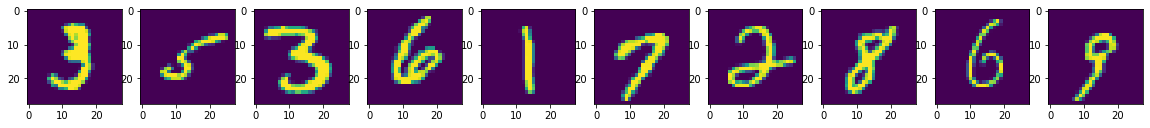

In [5]:
plotIm(X_train[10:20])

# Create a CNN

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), activation = 'relu', padding = 'same', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                401472    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 402,954
Trainable params: 402,954
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(optimizer= 'adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy']
              )

# Training the model

In [9]:
history = model.fit(X_train, y_train,
                    batch_size= 100,
                    epochs= 10,
#                     steps_per_epoch=steps_per_epoch,
                    validation_split=0.1, 
#                     validation_steps=validation_steps
                    )

Epoch 1/10
540/540 [==============================] - 16s 28ms/step - loss: 3.7898 - sparse_categorical_accuracy: 0.2095 - val_loss: 1.7677 - val_sparse_categorical_accuracy: 0.3267
Epoch 2/10
540/540 [==============================] - 14s 26ms/step - loss: 1.9205 - sparse_categorical_accuracy: 0.2705 - val_loss: 1.2653 - val_sparse_categorical_accuracy: 0.5690
Epoch 3/10
540/540 [==============================] - 14s 26ms/step - loss: 1.5449 - sparse_categorical_accuracy: 0.4120 - val_loss: 0.2814 - val_sparse_categorical_accuracy: 0.9457
Epoch 4/10
540/540 [==============================] - 14s 26ms/step - loss: 0.7633 - sparse_categorical_accuracy: 0.7232 - val_loss: 0.1006 - val_sparse_categorical_accuracy: 0.9753
Epoch 5/10
540/540 [==============================] - 14s 26ms/step - loss: 0.3796 - sparse_categorical_accuracy: 0.8739 - val_loss: 0.0774 - val_sparse_categorical_accuracy: 0.9797
Epoch 6/10
540/540 [==============================] - 14s 26ms/step - loss: 0.2638 - spars

In [10]:
# Evaluate the best model with testing data.
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9801
[0.08069019764661789, 0.9800999760627747]


# Sanity Check

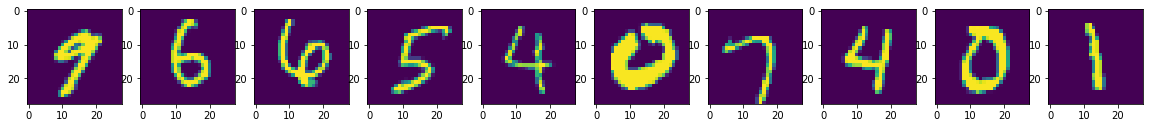

In [12]:
plotIm(X_test[20:30])

In [14]:
pred = np.argmax(model.predict(X_test[20:30]), axis=-1)
print(pred)

[9 6 6 5 4 0 7 4 0 1]
